In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
house = fetch_california_housing()

In [5]:
house

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [6]:
df = pd.DataFrame(house.data)

In [7]:
df.columns = house.feature_names
df['MedHouseVal'] = house.target

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
X = df.drop(columns = 'MedHouseVal').copy()
y = df['MedHouseVal'].copy()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
rt = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 7)

In [36]:
rt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=7)

In [37]:
y_pred = rt.predict(X_test)

In [38]:
r2_score(y_test,y_pred)

0.651570068601148

# Hyperparameter Tuning

In [17]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'max_depth':[2,4,8,10,None],
    'criterion':['absolute_error', 'squared_error'],
    'max_features':[0.25,0.5,1.0],
    'min_samples_split':[0.25,0.5,1.0]
}

In [ ]:
reg = GridSearchCV(DecisionTreeRegressor(),param_grid)

In [ ]:
reg.fit(X_train,y_train)

In [ ]:
reg.best_score_

In [ ]:
reg.best_params_

# Feature Importance

In [ ]:
for importance, name in sorted(zip(rt.feature_importances_, X_train.columns),reverse=True):
  print (name, importance)

In [18]:
from sklearn.tree import plot_tree

[Text(0.49789186507936506, 0.9375, 'x[0] <= 5.086\nsquared_error = 1.337\nsamples = 16512\nvalue = 2.072'),
 Text(0.24975198412698413, 0.8125, 'x[0] <= 3.074\nsquared_error = 0.834\nsamples = 13101\nvalue = 1.74'),
 Text(0.12698412698412698, 0.6875, 'x[2] <= 4.314\nsquared_error = 0.561\nsamples = 6268\nvalue = 1.358'),
 Text(0.06349206349206349, 0.5625, 'x[0] <= 2.215\nsquared_error = 0.679\nsamples = 2624\nvalue = 1.626'),
 Text(0.031746031746031744, 0.4375, 'x[2] <= 3.422\nsquared_error = 0.575\nsamples = 1404\nvalue = 1.377'),
 Text(0.015873015873015872, 0.3125, 'x[3] <= 1.027\nsquared_error = 0.832\nsamples = 482\nvalue = 1.775'),
 Text(0.007936507936507936, 0.1875, 'x[7] <= -121.825\nsquared_error = 0.459\nsamples = 167\nvalue = 1.436'),
 Text(0.003968253968253968, 0.0625, 'squared_error = 1.416\nsamples = 26\nvalue = 1.777'),
 Text(0.011904761904761904, 0.0625, 'squared_error = 0.257\nsamples = 141\nvalue = 1.373'),
 Text(0.023809523809523808, 0.1875, 'x[6] <= 34.045\nsquared_er

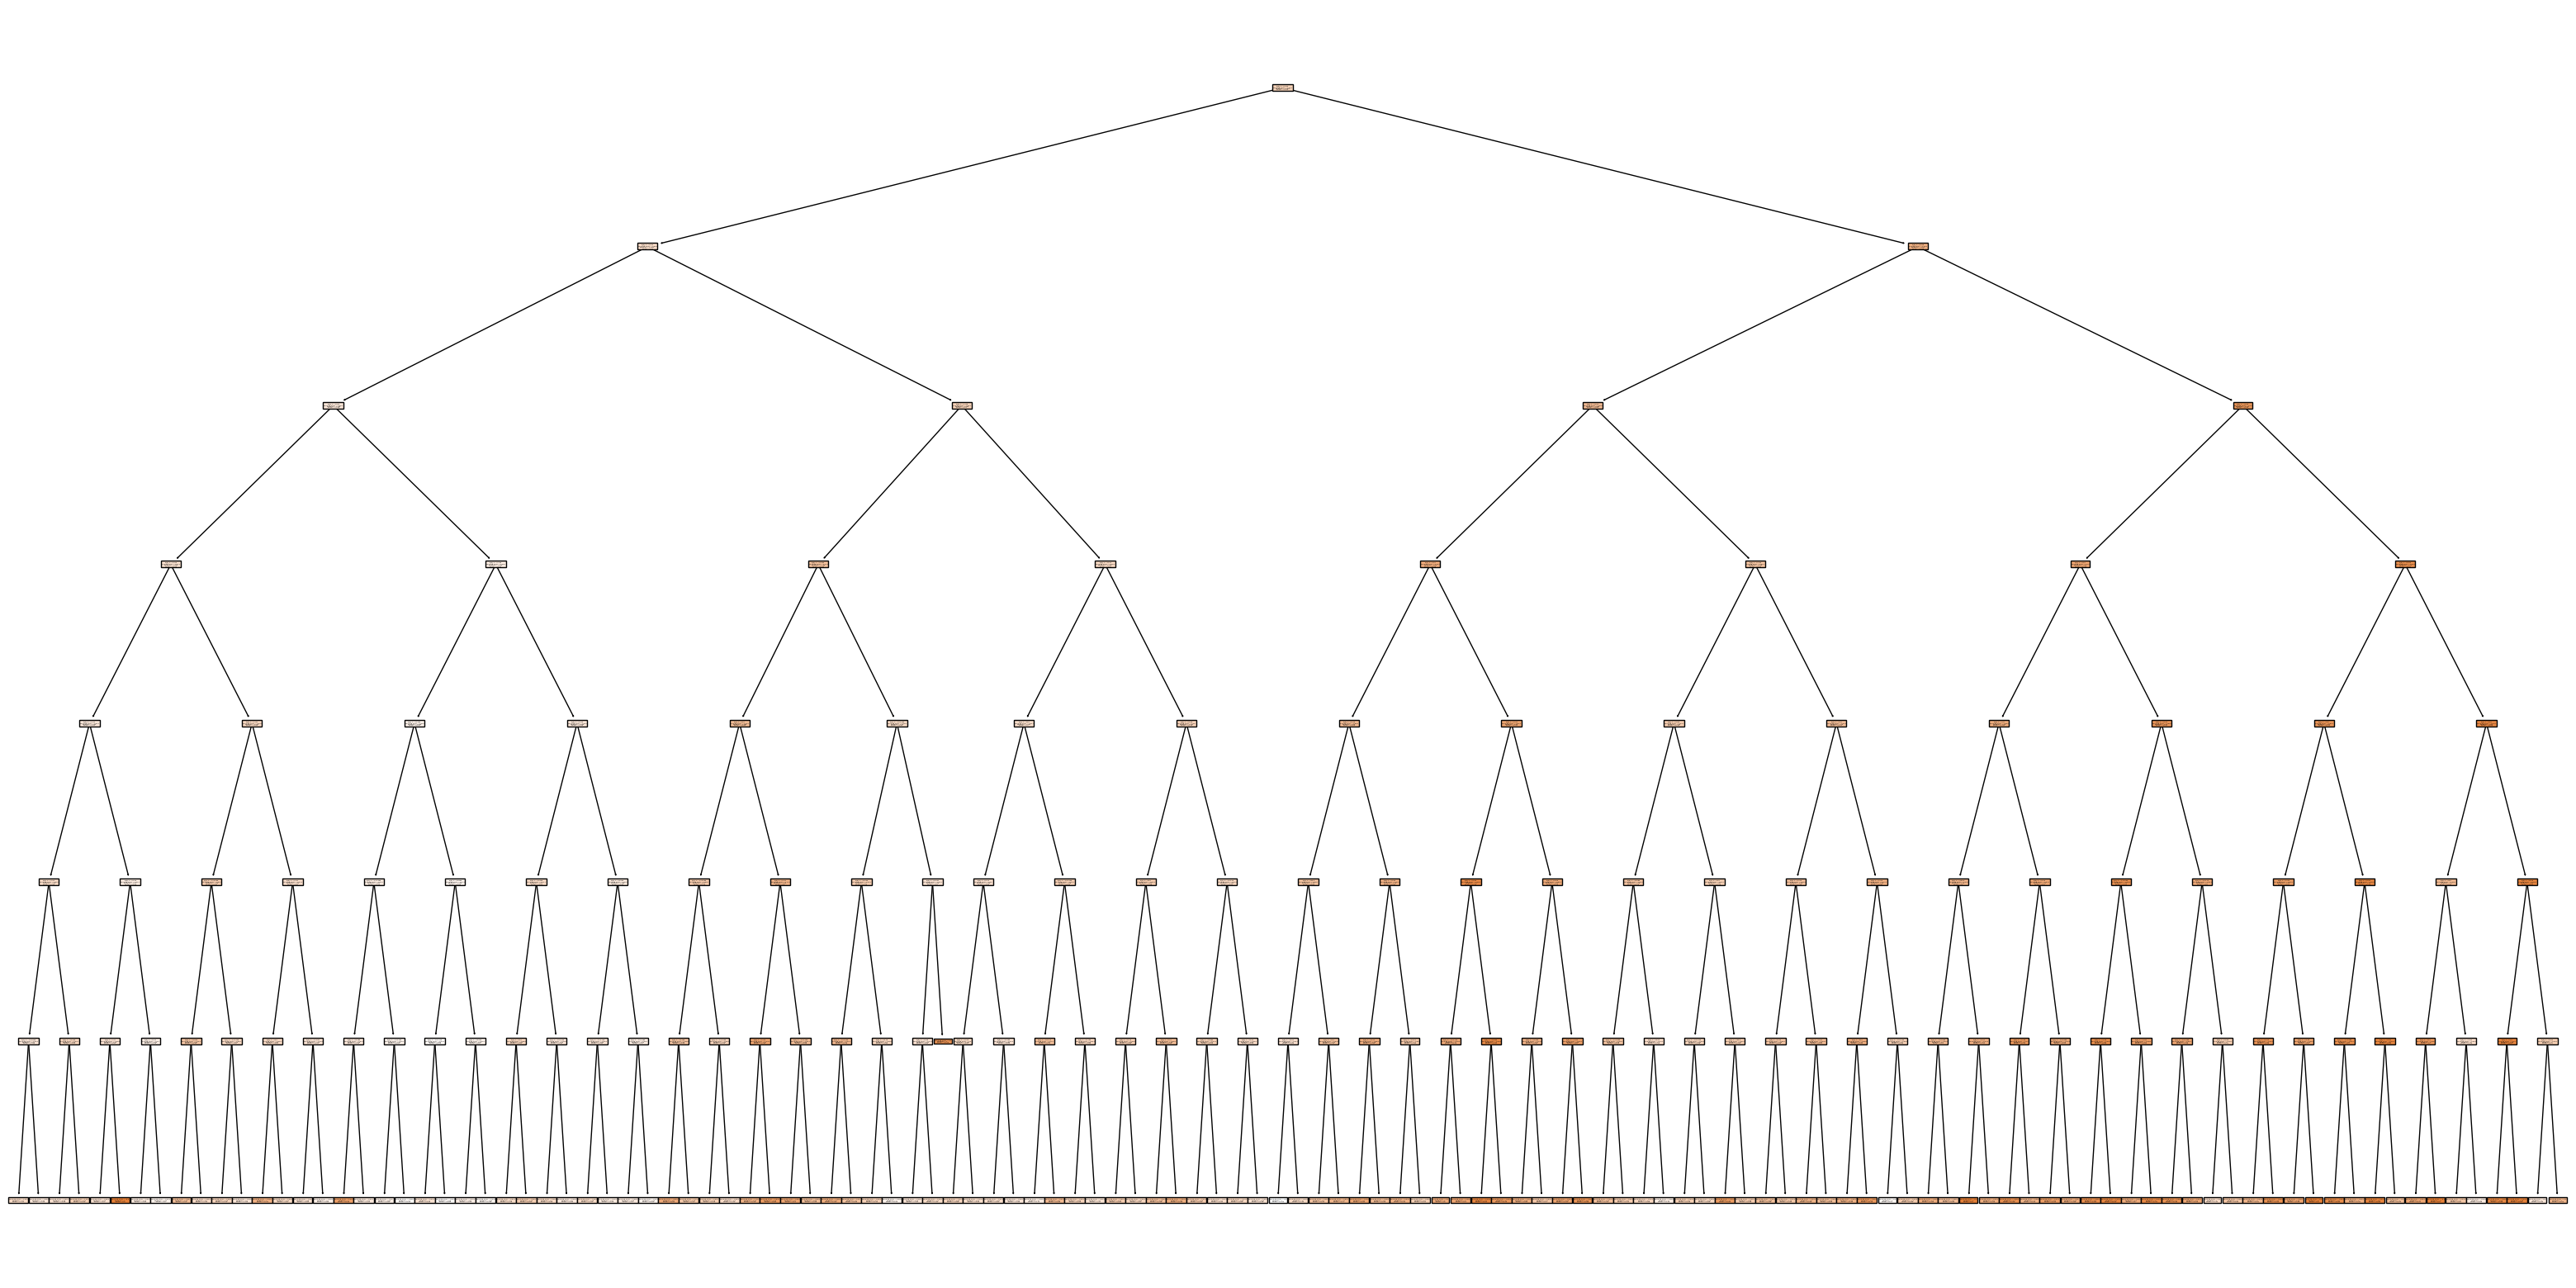

In [39]:
plt.figure(figsize = (40, 20))
plot_tree(rt, filled = True)